# Obtener un grafo de la zona de interés

La bilbioteca principal es osmnx que permite extraer un objeto de networkx a partir de una ubicación.

In [1]:
import osmnx as ox
import networkx as nx 
#import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Se utiliza las coordenadas asociadas al puente del guambra en latitud y longitud.

In [4]:
# from a point
point = (-0.206412, -78.499363)

Se puede solicitar un grafo de la zona que rodea a un punto. En este caso no se aplica ningún filtro en la solicitud.

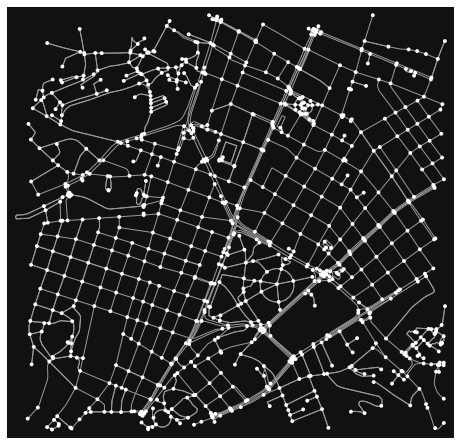

In [8]:
graph = ox.graph_from_point(point, dist=1000)

# Project the graph
graph_proj = ox.project_graph(graph)
# plot the graph
fig, ax = ox.plot_graph(graph_proj)

El grafo cuenta con una inmensa cantidad de ramas.

In [10]:
len(graph.edges)

1866

## Reducir el número de ramas en el grafo

Primero, se realiza un filtro para que las ramas sólo reflejen las calles por las que se puede conducir.

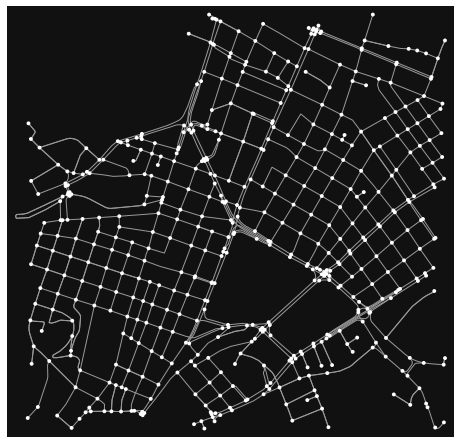

In [14]:
graph = ox.graph_from_point(point, dist=1000, simplify=True, network_type="drive")

# Project the graph
graph_proj = ox.project_graph(graph)
# plot the graph
fig, ax = ox.plot_graph(graph_proj)

In [15]:
len(graph.edges)

950

Ya que siguen existiendo demasiadas conexiones, se utiliza un filtro personalizado para eliminar calles secundarias.

Filtro personalizado: clave ~ valor

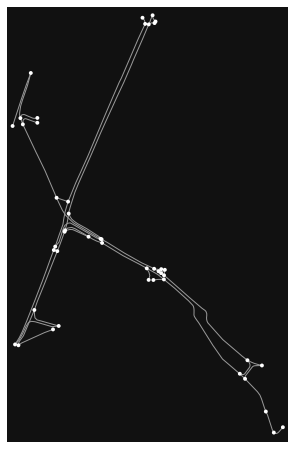

In [33]:
filtro = '["highway"~"primary"]'
graph = ox.graph_from_point(point, dist=1000, simplify=True, custom_filter=filtro)
# Project the graph
graph_proj = ox.project_graph(graph)
# plot the graph
fig, ax = ox.plot_graph(graph_proj)

Se agregan las calles secundarias.

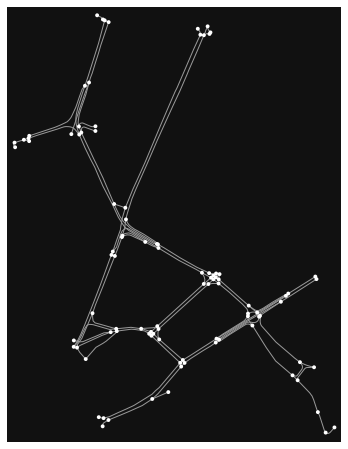

In [4]:
filtro = '["highway"~"primary|secondary"]'
graph = ox.graph_from_point(point, dist=1000, simplify=True, custom_filter=filtro)
# Project the graph
graph_proj = ox.project_graph(graph)
# plot the graph
fig, ax = ox.plot_graph(graph_proj)

Finalmente, se agregan las calles de tercera categoría para que el grafo no sea demasiado simple. Este es el modelo sobre el cual se va a seguir desarrollando el proyecto.

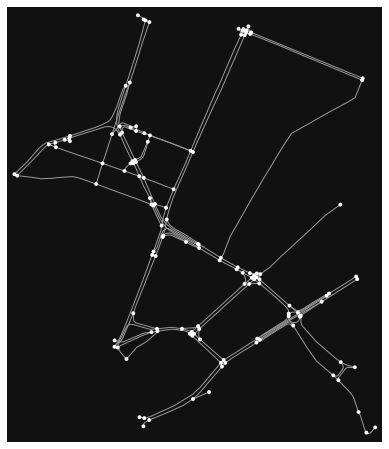

In [15]:
filtro = '["highway"~"primary|secondary|tertiary"]'
graph = ox.graph_from_point(point, dist=1000, simplify=True, custom_filter=filtro)
# Project the graph
graph_proj = ox.project_graph(graph)

# plot the graph
fig, ax = ox.plot_graph(graph_proj)

Se guarda el grafo para utilizarlo en el futuro.

In [16]:
import pickle
a = graph
with open('Mapa_OSMNX.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

Se hace un pequeño experimento pidiendo las calles residenciales y generando un rango de números para presentar color. El objetivo es visualizar nodos de color en el grafo de networkx.

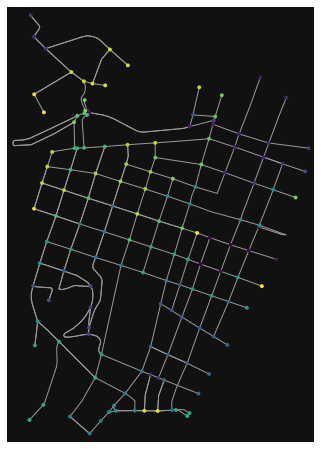

In [6]:
filtro = '["highway"~"residential"]'
graph = ox.graph_from_point(point, dist=1000, simplify=True, custom_filter=filtro)
# Project the graph
graph_proj = ox.project_graph(graph)
colors = range(142)
# plot the graph
fig, ax = ox.plot_graph(graph_proj,node_color=colors)


## Información que contiene el grafo

Los nodos consisten en una lista de números determinados por osmnx.

In [17]:
g_nodes = list(graph.nodes)

In [18]:
g_nodes[:10]

[264268562,
 264268564,
 264268569,
 264270346,
 264270354,
 267036650,
 267036924,
 267036926,
 267036927,
 267037880]

Los nodos contienen información sobre el punto geográfico que representan. Muestran su información en latitud y longitud.

In [16]:
graph.nodes[267037984]

{'y': -0.2125004,
 'x': -78.4969539,
 'highway': 'traffic_signals',
 'street_count': 3}

Las ramas consisten en una lista de tuplas que contienen tres datos: nodo del que sale, nodo al que llega, peso de la conexión.

In [13]:
aristas = list(graph.edges)

In [14]:
aristas[:10]

[(264268564, 3069687543, 0),
 (264268564, 264268569, 0),
 (264268564, 4207542600, 0),
 (264268569, 850445058, 0),
 (264268569, 267939607, 0),
 (264268569, 264268564, 0),
 (264270346, 264270354, 0),
 (264270346, 267939758, 0),
 (264270354, 264270346, 0),
 (264270354, 3726280025, 0)]

Si se pide información de una rama en específico se puede encontrar el sentido de la calle: oneway, si es falso, signica que esa calle permite circulación en doble sentido.

In [11]:
graph.edges[(267036924, 267960698, 0)]

{'osmid': [420853981, 24559926],
 'tunnel': 'yes',
 'oneway': True,
 'lanes': '3',
 'highway': 'primary_link',
 'maxspeed': '50',
 'length': 259.342,
 'geometry': <shapely.geometry.linestring.LineString at 0x200cafa94c0>}

In [10]:
graph.edges[(267038223, 2742811190, 0)]

{'osmid': [24560089, 532133793],
 'oneway': True,
 'lanes': '2',
 'name': 'Avenida Tarqui',
 'highway': 'secondary',
 'length': 148.446,
 'geometry': <shapely.geometry.linestring.LineString at 0x200cae5eeb0>}